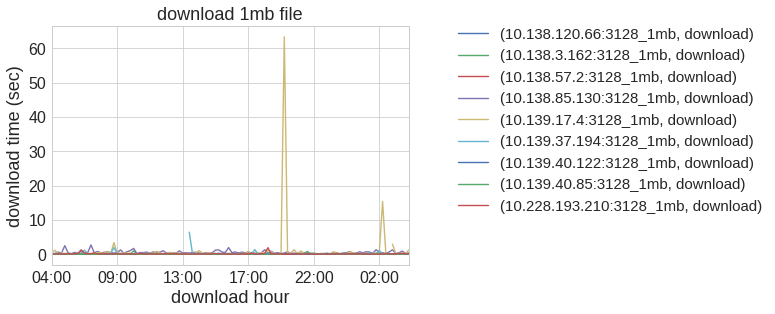

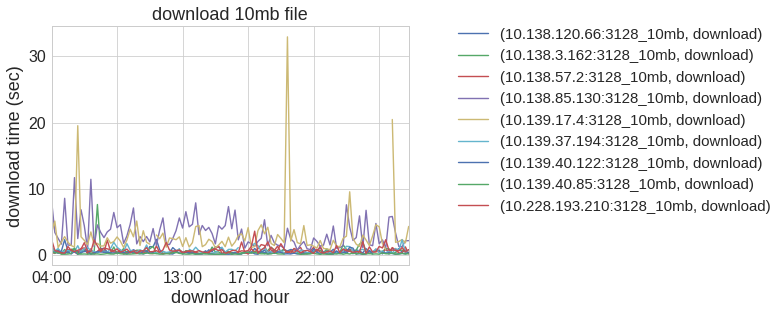

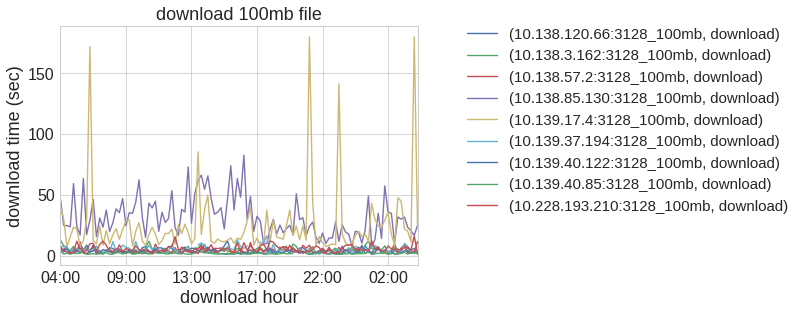

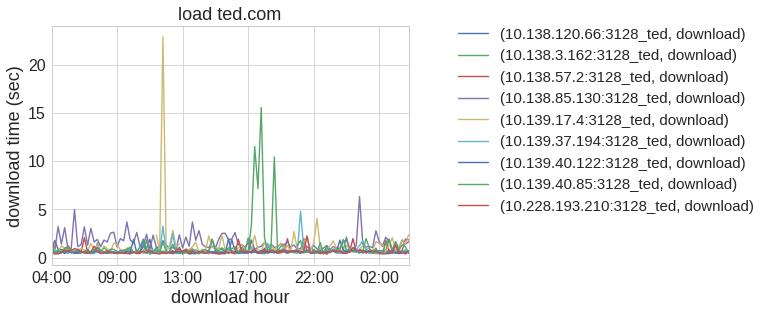

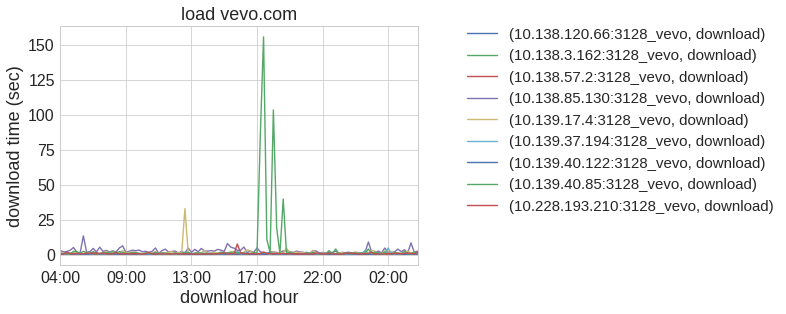

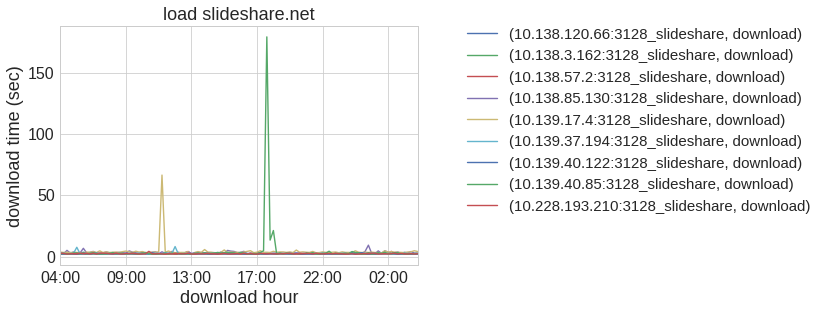

In [11]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

EXP_1NAME = "inputs/lluc/8clients/74/1mb"
EXP_10NAME = "inputs/lluc/8clients/74/10mb"
EXP_100NAME = "inputs/lluc/8clients/74/100mb"
EXP_1GBNAME = "inputs/lluc/8clients/74/1gb"
EXP_SLIDENAME = "inputs/lluc/8clients/74/slideshare"
EXP_VEVNAME = "inputs/lluc/8clients/74/vevo"
EXP_TEDNAME = "inputs/lluc/8clients/74/ted"

MAX_ROUNDS = 70
MAX_YVAL = 5

RESULTS_DIR = os.path.join( os.getcwd(),'results')
INPUT_DIR = os.path.join( os.getcwd(), EXP_1NAME)

headers = ['date', 'download', 'code'] 
dtypes = [pd.datetime, float, float]

##SET SEABORN STYLE
sns.set_style("whitegrid")
sns.set_context("paper")

##SET MATPLOTLIB STYLE
TICKS_FONTSIZE = 16
LABEL_FONTSIZE=18
LEGEND_FONTSIZE=15
linestyles = (':','-','.','--')

mpl.rcParams['xtick.labelsize'] = TICKS_FONTSIZE 
mpl.rcParams['ytick.labelsize'] = TICKS_FONTSIZE
mpl.rcParams['legend.fontsize'] = TICKS_FONTSIZE
mpl.rcParams['axes.labelsize'] = LABEL_FONTSIZE
mpl.rcParams['axes.titlesize'] = LABEL_FONTSIZE
mpl.rcParams['font.size'] = LABEL_FONTSIZE
plt.rc('legend',**{'fontsize':LEGEND_FONTSIZE})


#Read input files from the directory and returns DataTable object in a combined list
def read_inputs(exp_name, columns):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), exp_name)
    nodes = [f for f in os.listdir(INPUT_DIR) if os.path.isfile(os.path.join(INPUT_DIR, f))]
    #Load results from each node
    nodes_results = {}
    for node in nodes:
        f = os.path.join(INPUT_DIR,node)
        try:
            nodes_results[node] = pd.read_csv(f,  usecols=columns, parse_dates=['date'], index_col=0).query('status == 200')
            nodes_results[node] = nodes_results[node].drop(['status'],1)
            nodes_results[node] = nodes_results[node].replace('None',np.nan)
        except Exception:
            print(node, 'EXception')
    return nodes_results

def plot_var_per_round(results, var):
    """Plot the median acrros nodes of a variable"""
    median = getMedianDF(results,var)
    #Create new figure
    fig = plt.figure()
    #Print the plot
    median.plot()
    #Modify parameters
    plt.ylabel(var)
    #plt.xlabel('Date')
    plt.xlim(0,MAX_ROUNDS)
    plt.show()

# Plot results to the separately
def plot_separately(results,y_label, legends):
    df = pd.concat(results,axis=1)
    df.index = df.index.to_series().dt.strftime('%H:00')
    ax = df.plot(title=y_label)
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    #print(df.mean())
    ax.set_xlabel('download hour')
    ax.set_ylabel('download time (sec)')
    #plt.ylim(0,0.25)
    plt.show()
    



if __name__ == '__main__':
    nodes_results1 = read_inputs(EXP_1NAME,["date", "download", "status"])
    nodes_results2 = read_inputs(EXP_10NAME,["date", "download", "status"])
    nodes_results3 = read_inputs(EXP_100NAME,["date", "download", "status"])
    nodes_results4 = read_inputs(EXP_TEDNAME,["date", "download", "status"])
    nodes_results5 = read_inputs(EXP_VEVNAME, ["date", "download", "status"])
    nodes_results6 = read_inputs(EXP_SLIDENAME, ["date", "download", "status"])
    plot_separately(nodes_results1, 'download 1mb file', list(nodes_results1))
    plot_separately(nodes_results2, 'download 10mb file', list(nodes_results2))    
    plot_separately(nodes_results3, 'download 100mb file', list(nodes_results3))
    plot_separately(nodes_results4, 'load ted.com', list(nodes_results3))
    plot_separately(nodes_results5, 'load vevo.com', list(nodes_results3))
    plot_separately(nodes_results6, 'load slideshare.net', list(nodes_results3))

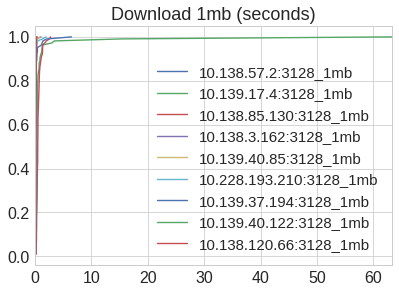

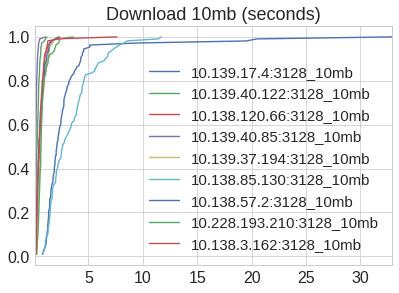

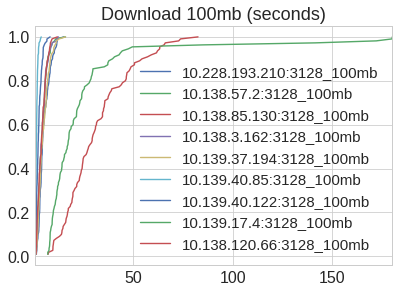

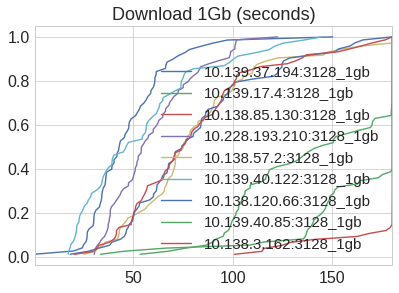

In [12]:
def plot_ecdf(results, var, title):
    """Plot the ECDF of the median accross the nodes of a variable"""
    lbl = []
    for v in var:
        series = pd.Series(results[v].download)
        ecdf = getECDF(results[v])
        ecdf.plot(title=title)
        lbl.append(v)
    plt.legend(lbl, loc = 'lower right')
    
    #plt.xlim(0,1)
    plt.show()
    
######### Assistant functions###############

def getECDF(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.download.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()
    return ecdf


if __name__ == '__main__':
    nodes_results1 = read_inputs(EXP_1NAME,["date", "download", "status"])
    nodes_results2 = read_inputs(EXP_10NAME,["date", "download", "status"])
    nodes_results3 = read_inputs(EXP_100NAME,["date", "download", "status"])
    nodes_results4 = read_inputs(EXP_1GBNAME,["date", "download", "status"])

    
    plot_ecdf(nodes_results1, list(nodes_results1), 'Download 1mb (seconds)')
    plot_ecdf(nodes_results2, list(nodes_results2), 'Download 10mb (seconds)')
    plot_ecdf(nodes_results3, list(nodes_results3), 'Download 100mb (seconds)')
    plot_ecdf(nodes_results4, list(nodes_results4), 'Download 1Gb (seconds)')

0.030    0.002245
0.031    0.010101
0.032    0.017957
0.033    0.026936
0.034    0.046016
0.035    0.068462
0.036    0.085297
0.037    0.105499
0.038    0.133558
0.039    0.149270
0.040    0.169473
0.041    0.193042
0.042    0.210999
0.043    0.225589
0.044    0.235690
0.045    0.252525
0.046    0.261504
0.047    0.276094
0.048    0.291807
0.049    0.301908
0.050    0.312009
0.051    0.317621
0.052    0.334456
0.053    0.345679
0.054    0.352413
0.055    0.368126
0.056    0.372615
0.057    0.382716
0.058    0.388328
0.059    0.397306
           ...   
0.226    0.955107
0.229    0.957351
0.231    0.961841
0.232    0.962963
0.237    0.964085
0.238    0.966330
0.242    0.967452
0.246    0.969697
0.247    0.971942
0.249    0.974186
0.251    0.977553
0.254    0.978676
0.255    0.979798
0.257    0.980920
0.258    0.982043
0.262    0.983165
0.266    0.984287
0.267    0.985410
0.290    0.986532
0.313    0.987654
0.336    0.989899
0.337    0.991021
0.362    0.992144
0.451    0.993266
0.474    0

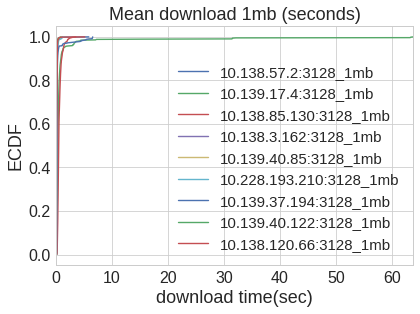

0.710     0.001139
0.712     0.002278
0.732     0.003417
0.743     0.004556
0.750     0.005695
0.763     0.006834
0.793     0.007973
0.803     0.009112
0.808     0.010251
0.811     0.011390
0.812     0.012528
0.815     0.013667
0.819     0.014806
0.820     0.015945
0.821     0.018223
0.832     0.019362
0.838     0.020501
0.842     0.021640
0.844     0.022779
0.848     0.023918
0.858     0.025057
0.884     0.028474
0.889     0.029613
0.897     0.031891
0.903     0.033030
0.908     0.034169
0.914     0.035308
0.926     0.036446
0.935     0.037585
0.938     0.038724
            ...   
5.877     0.966970
5.942     0.968109
6.056     0.969248
6.254     0.970387
6.369     0.971526
6.446     0.972665
6.458     0.973804
6.589     0.974943
6.654     0.976082
6.973     0.977221
7.416     0.978360
7.475     0.979499
7.477     0.980638
7.764     0.981777
8.027     0.982916
8.158     0.984055
8.611     0.985194
8.754     0.986333
9.155     0.987472
9.547     0.988610
10.905    0.989749
11.899    0.

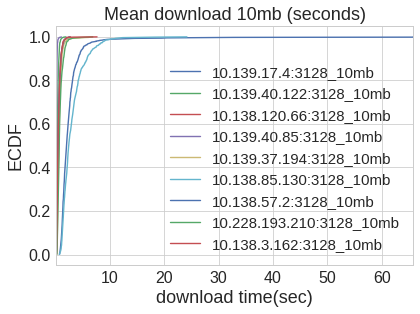

1.411     0.001122
1.452     0.002245
1.493     0.003367
1.503     0.004489
1.605     0.005612
1.607     0.006734
1.608     0.007856
1.657     0.008979
1.680     0.010101
1.681     0.011223
1.685     0.012346
1.713     0.013468
1.745     0.014590
1.753     0.015713
1.812     0.016835
1.821     0.017957
1.828     0.019080
1.835     0.020202
1.843     0.021324
1.853     0.022447
1.864     0.023569
1.876     0.024691
1.881     0.025814
1.894     0.026936
1.943     0.028058
1.951     0.029181
1.989     0.030303
1.990     0.031425
1.993     0.032548
1.999     0.033670
            ...   
12.004    0.967452
12.069    0.968575
12.071    0.969697
12.147    0.970819
12.179    0.971942
12.395    0.973064
12.419    0.974186
12.497    0.975309
12.511    0.976431
12.723    0.977553
12.962    0.978676
12.974    0.979798
13.179    0.980920
13.223    0.982043
13.911    0.983165
14.421    0.984287
14.471    0.985410
14.798    0.986532
15.202    0.987654
15.506    0.988777
15.902    0.989899
16.674    0.

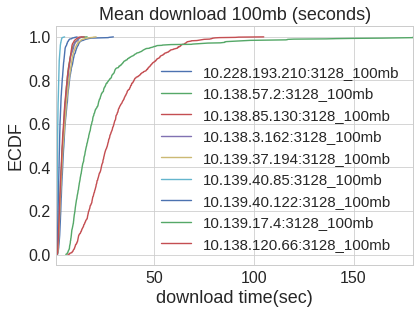

0.843      0.001835
0.866      0.003670
1.313      0.005505
20.067     0.007339
21.230     0.009174
21.486     0.011009
22.378     0.012844
22.443     0.014679
22.859     0.016514
22.951     0.018349
23.138     0.020183
23.155     0.022018
23.410     0.023853
23.482     0.025688
23.661     0.027523
23.771     0.029358
23.963     0.031193
24.038     0.033028
24.044     0.034862
24.116     0.036697
24.242     0.038532
24.508     0.040367
24.598     0.042202
24.616     0.044037
24.696     0.045872
25.066     0.047706
25.072     0.049541
25.131     0.051376
25.133     0.053211
25.231     0.055046
             ...   
93.201     0.944954
94.067     0.946789
94.690     0.948624
94.767     0.950459
96.736     0.952294
97.241     0.954128
98.117     0.955963
99.489     0.957798
99.853     0.959633
101.439    0.961468
102.327    0.963303
102.676    0.965138
103.273    0.966972
104.048    0.968807
104.711    0.970642
105.700    0.972477
107.140    0.974312
111.374    0.976147
112.584    0.977982


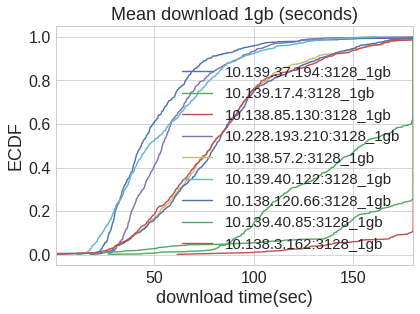

In [7]:
INPUT_DIR = "inputs/lluc/8clients/"

def plot_mean_ecdf(test,inputs, title):
    results = {}
    for client in inputs:
        nodes = read_inputs(INPUT_DIR+client+'/'+test, ["date", "download", "status"])
        keys = list(nodes)
        for key in keys:
            if key in results.keys():
                results[key] = pd.concat([results[key], pd.DataFrame(nodes[key].download)])
            else:
                results[key] = pd.DataFrame(nodes[key].download)
    lbl = []
    for key in list(results):
        results[key].index = pd.to_datetime(results[key].index)
        ecdf = getECDF(results[key])
        ax = ecdf.plot(title=title)
        ax.set_ylabel('ECDF')
        ax.set_xlabel('download time(sec)')
        lbl.append(key)
    
    plt.legend(lbl, loc = 'lower right')
    #lt.xlim(0,3)
    plt.show()


def plot_mean(test,inputs, title):
    results = {}
    for client in inputs:
        nodes = read_inputs(INPUT_DIR+'/'+client+'/'+test, ["date", "download", "status"])
        keys = list(nodes)
        for key in keys:
            if key in results.keys():
                results[key] = pd.concat([results[key], pd.DataFrame(nodes[key].download)])
            else:
                results[key] = pd.DataFrame(nodes[key].download)
    
    df = pd.concat(results,axis=1)
    df.plot(subplots=True)
    plt.show()
    

    
if __name__ == '__main__':
    inputs = ['74','77','78','115','116','118','180','181']
    plot_mean_ecdf('1mb', inputs, 'Mean download 1mb (seconds)')
    plot_mean_ecdf('10mb', inputs, 'Mean download 10mb (seconds)')
    plot_mean_ecdf('100mb', inputs, 'Mean download 100mb (seconds)')
    plot_mean_ecdf('1gb', inputs, 'Mean download 1gb (seconds)')
    
    #plot_mean('1mb', inputs, 'Mean download 1mb (seconds)')
    #plot_mean('10mb', inputs, 'Mean download 10mb (seconds)')
    #plot_mean('100mb', inputs, 'Mean download 10mb (seconds)')

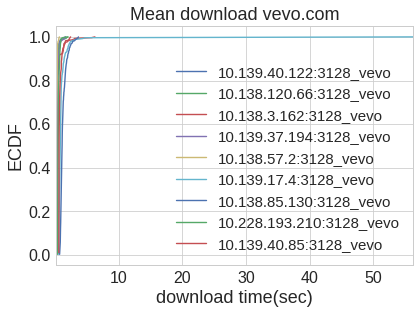

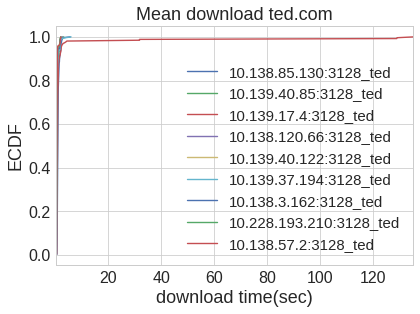

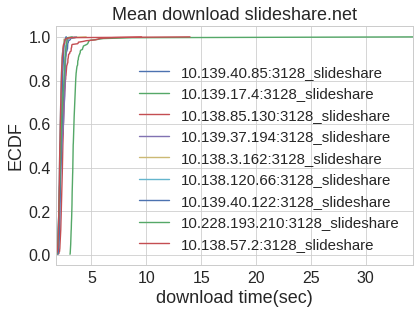

In [17]:
#def plot_download_websit():
    
if __name__ == '__main__':
    inputs = ['74','77','78','115','116','118','180','181']
    plot_mean_ecdf('vevo', inputs, 'Mean download vevo.com')
    plot_mean_ecdf('ted', inputs, 'Mean download ted.com')
    plot_mean_ecdf('slideshare', inputs, 'Mean download slideshare.net')